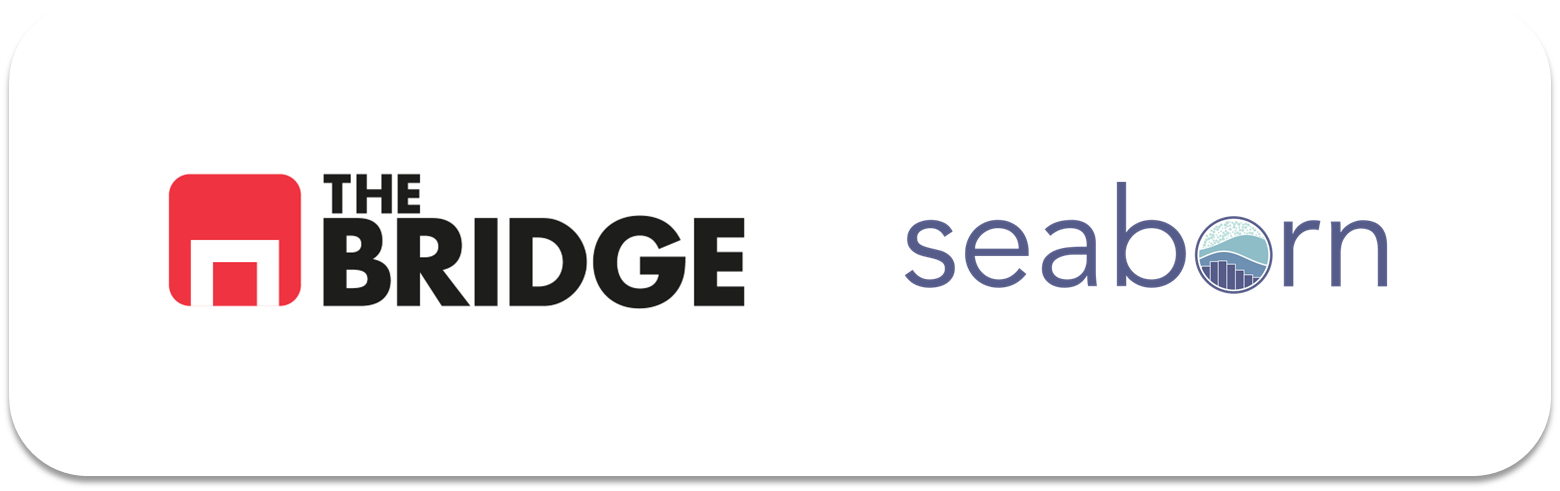

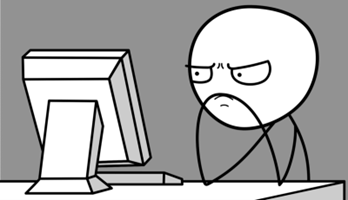

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [7]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_btc = pd.read_csv("./data/BTC.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

df_btc["fechas"] = pd.to_datetime(df_btc["date"])
df_btc.set_index("fechas", inplace = True)
df_btc.drop("date", axis = 1, inplace = True)

### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [10]:
def plot_categorical_frequencies(df, categorical_columns):
    
    """
    Esta función toma un DataFrame y una lista de columnas categóricas,
    y dibuja una matriz de gráficos de barras con las frecuencias absolutas
    de las columnas categóricas proporcionadas.

    :param df: DataFrame de pandas.
    :param categorical_columns: Lista de nombres de columnas categóricas.
    """

    num_columns = 2
    num_rows = (len(categorical_columns) + 1) // num_columns

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

    for idx, column in enumerate(categorical_columns):
        row = idx // num_columns
        col = idx % num_columns
        ax = axs[row, col]
        
        sns.countplot(x=df[column], ax=ax)
        ax.set_title(f"Frecuencias Absolutas de {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frecuencia")

    # Si el número de columnas no es par, eliminamos el gráfico vacío
    if len(categorical_columns) % num_columns != 0:
        fig.delaxes(axs[num_rows - 1, num_columns - 1])
    
    plt.tight_layout()
    plt.show()


### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


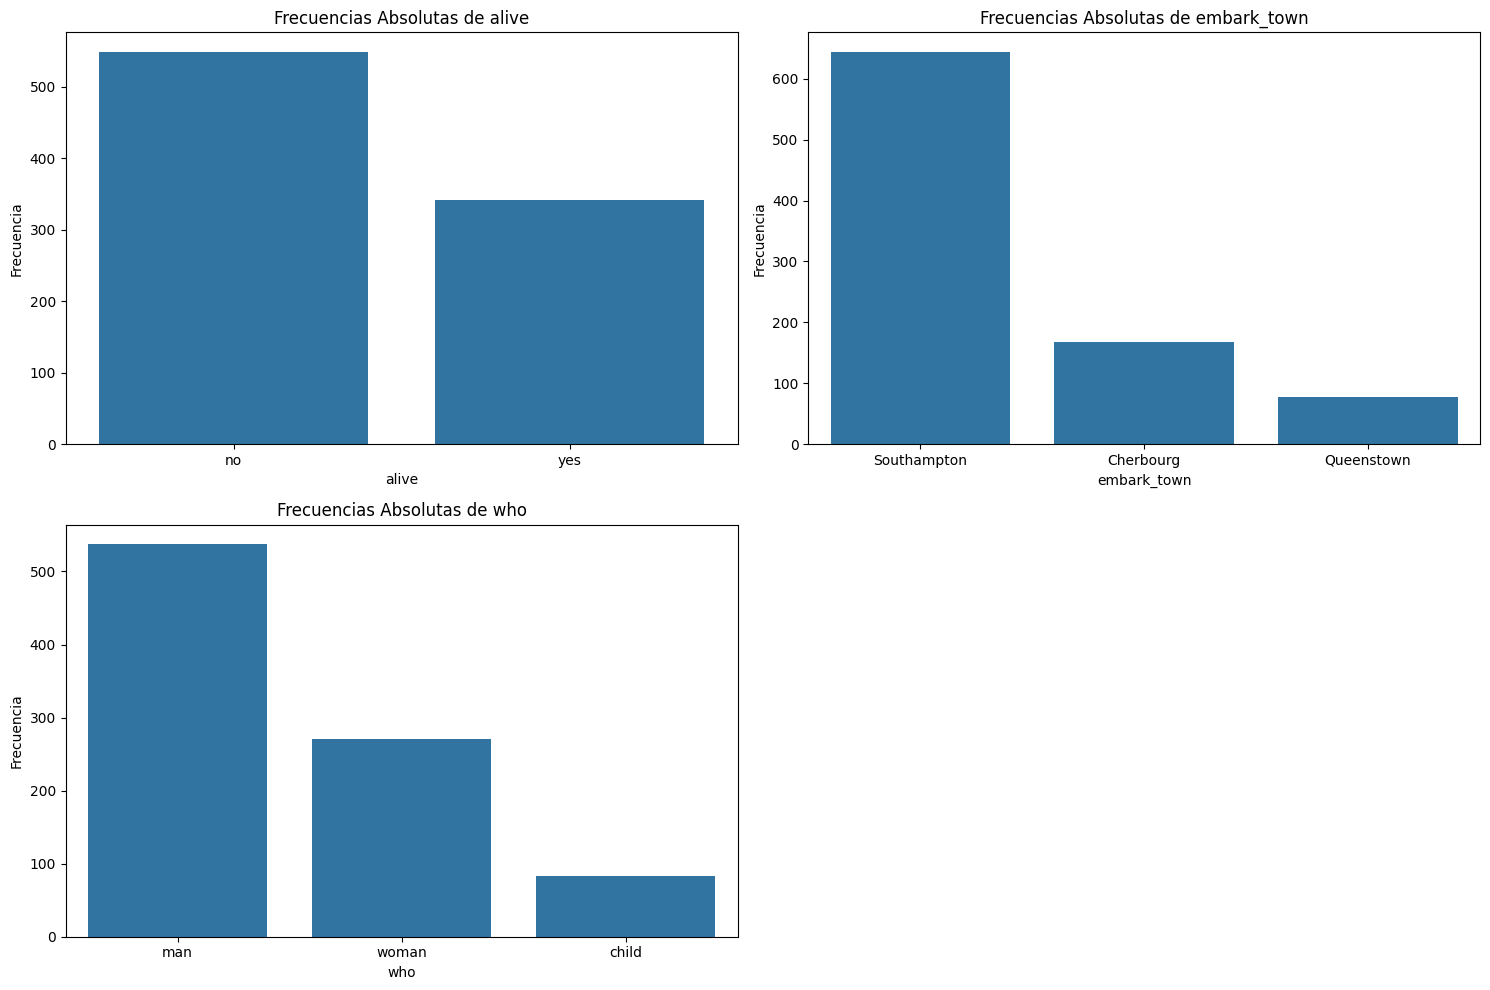

In [9]:
plot_categorical_frequencies(df_titanic, ["alive", "embark_town", "who"])

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada gráfica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [13]:
def plot_numerical_histograms(df, numerical_columns, bins = 10, density = False):
    
    """
    Esta función toma un DataFrame y una lista de columnas numéricas,
    y dibuja una matriz de histogramas con las columnas numéricas proporcionadas.

    :param df: DataFrame de pandas.
    :param numerical_columns: Lista de nombres de columnas numéricas.
    :param bins: Número de bins para los histogramas.
    :param density: Booleano que indica si se debe incluir la función de densidad.
    """

    num_columns = 2
    num_rows = (len(numerical_columns) + 1) // num_columns
    
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
    
    for idx, column in enumerate(numerical_columns):
        row = idx // num_columns
        col = idx % num_columns
        ax = axs[row, col]
        
        sns.histplot(df[column], bins = bins, kde = density, ax = ax)
        ax.set_title(f"Histograma de {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frecuencia")
        
    # Si el número de columnas no es par, eliminamos el gráfico vacío
    if len(numerical_columns) % num_columns != 0:
        fig.delaxes(axs[num_rows - 1, num_columns - 1])
    
    plt.tight_layout()
    plt.show()

### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

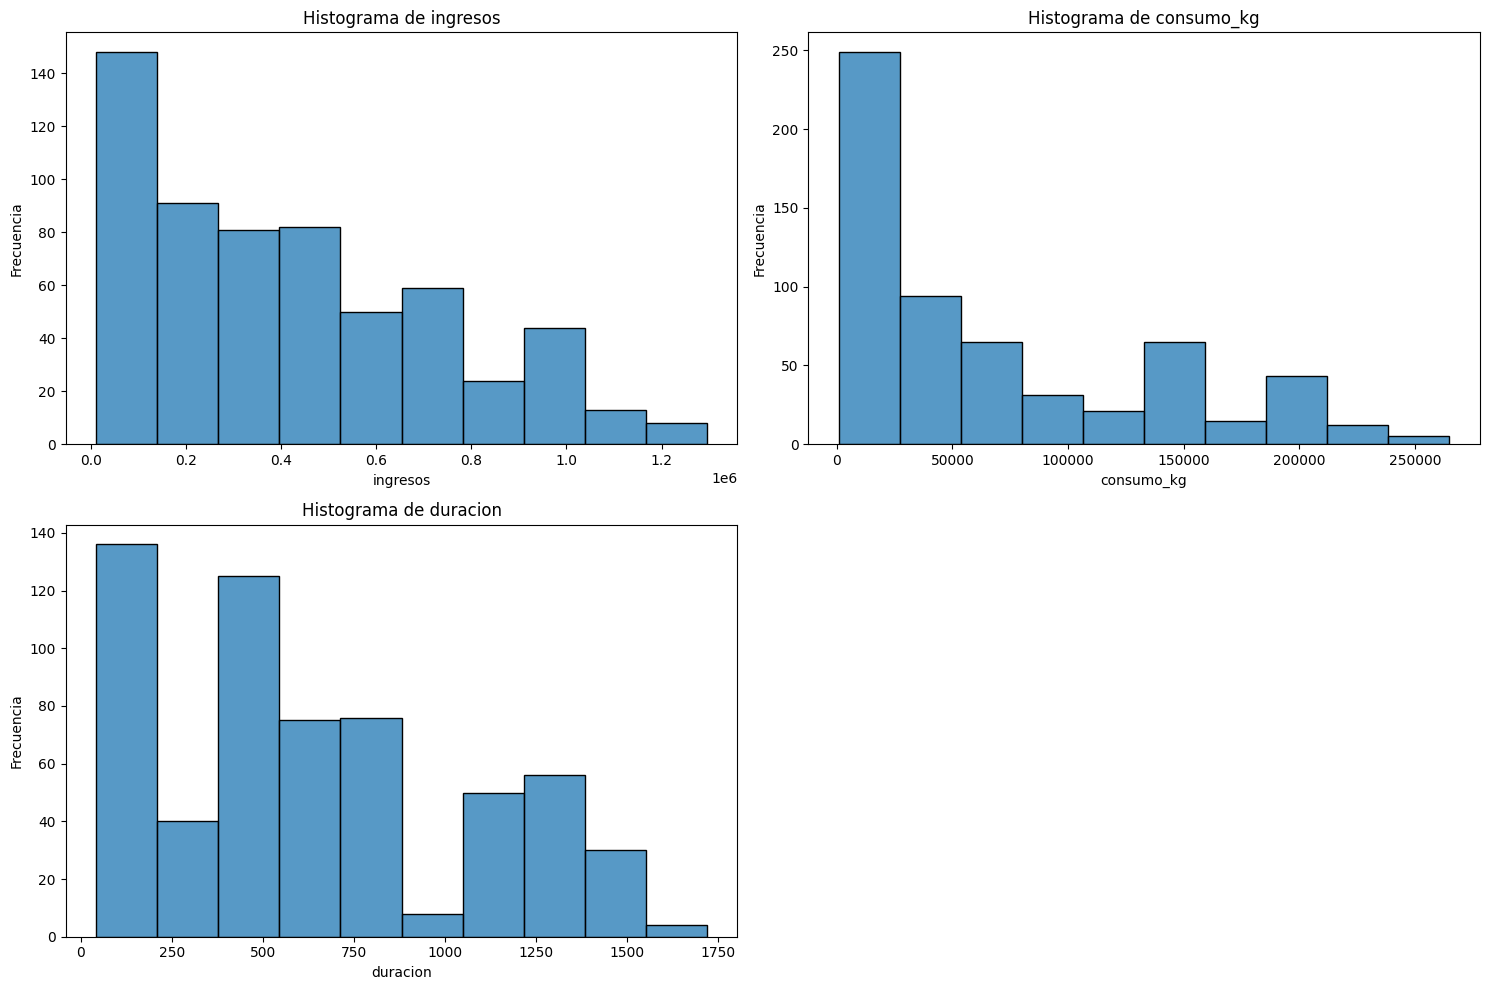

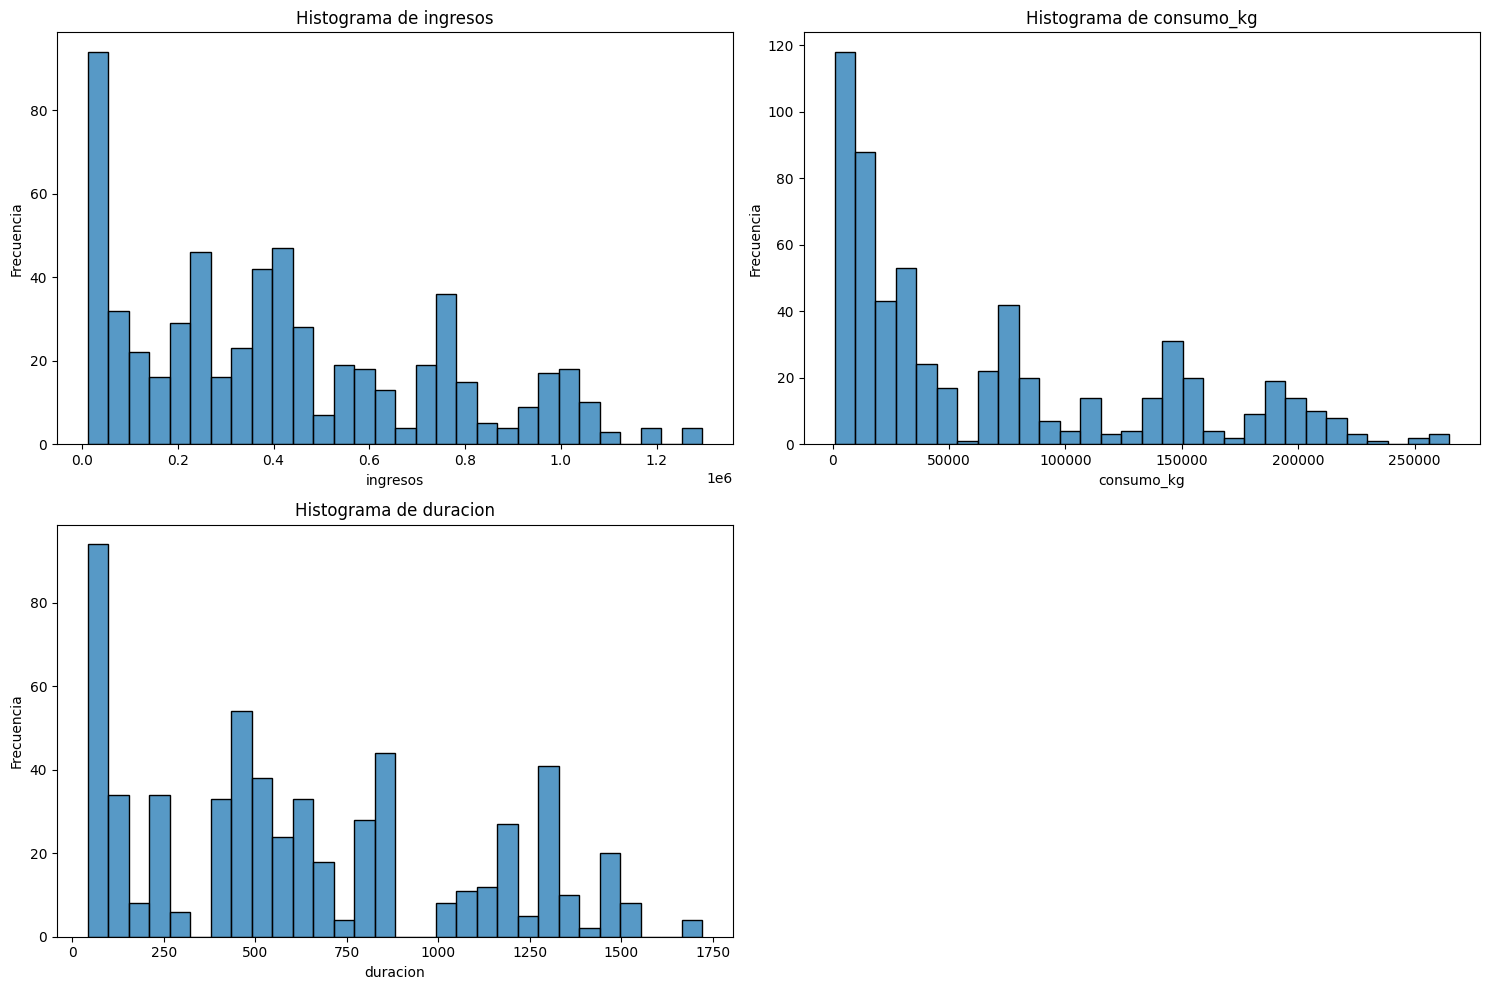

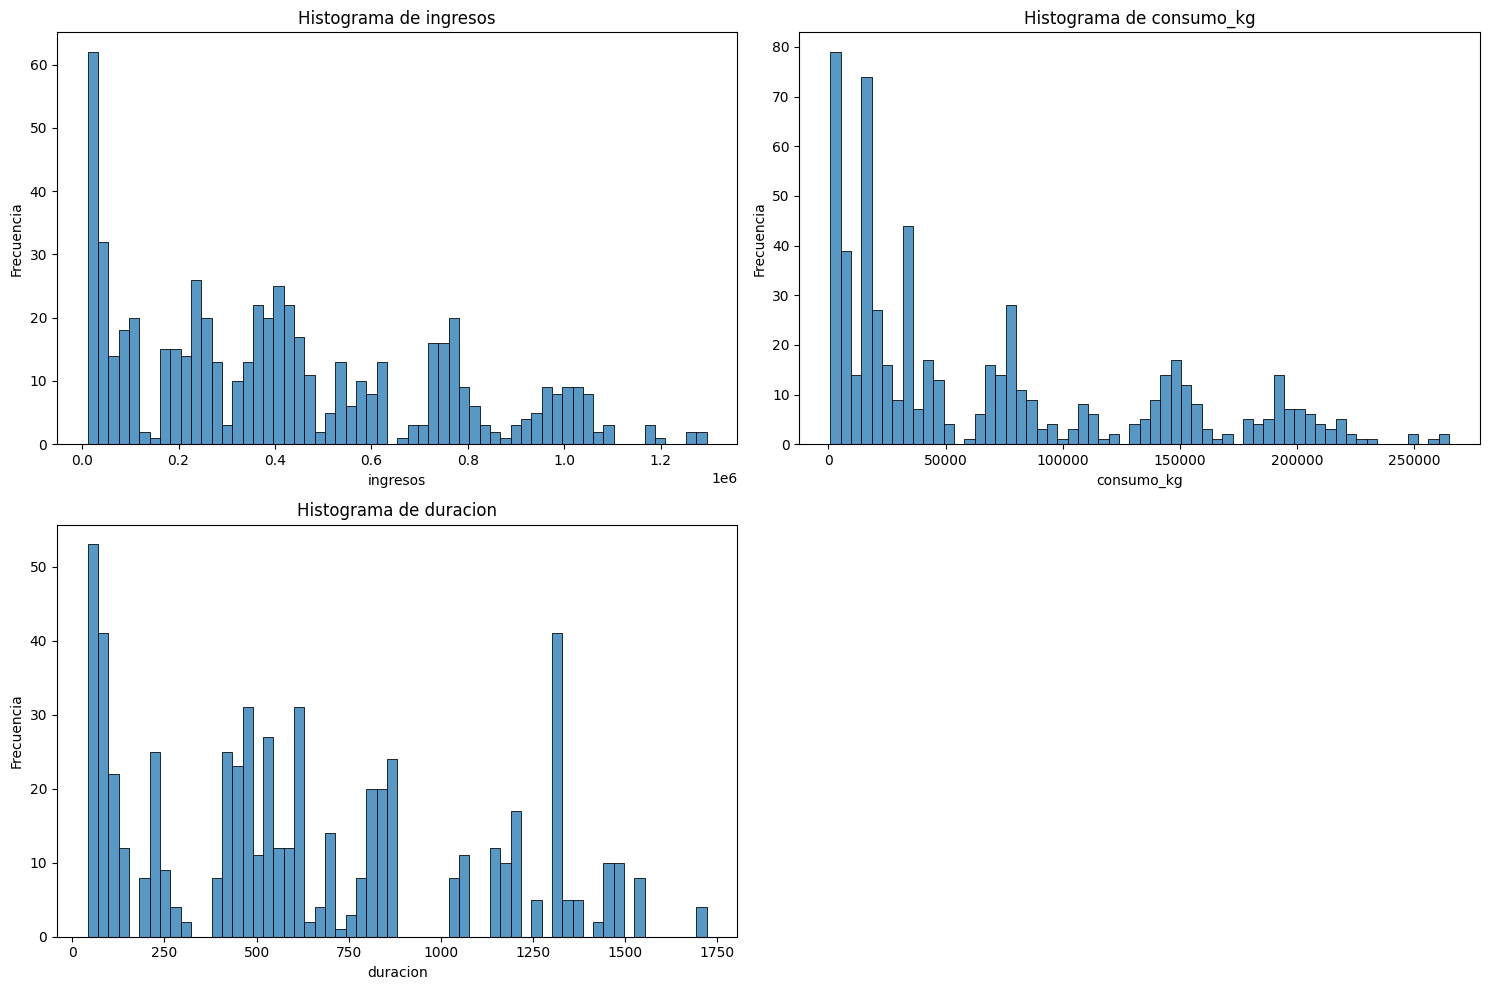

In [14]:
bins_list = [10, 30, 60]
for bins in bins_list:
    plot_numerical_histograms(df_viajes, ['ingresos', 'consumo_kg', 'duracion'], bins = bins, density = False)

- En general, 30 bins parece proporcionar un buen balance entre detalle y claridad para la mayoría de las columnas, especialmente cuando queremos una visualización más detallada que no sea abrumadora.

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [15]:
def plot_time_series(df, time_series_columns):
    """
    Esta función toma un DataFrame y una lista de columnas numéricas que representan
    series temporales o secuencias, y dibuja cada columna en una sola gráfica en
    una matriz de 2 columnas como máximo.

    :param df: DataFrame de pandas.
    :param time_series_columns: Lista de nombres de columnas numéricas.
    """
    num_columns = 2
    num_rows = (len(time_series_columns) + 1) // num_columns
    
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))
    
    for idx, column in enumerate(time_series_columns):
        row = idx // num_columns
        col = idx % num_columns
        ax = axs[row, col]
        
        sns.lineplot(data = df, x = df.index, y = column, ax = ax)
        ax.set_title(f"Serie Temporal de {column}")
        ax.set_xlabel("Índice")
        ax.set_ylabel(column)
        
    # Si el número de columnas no es par, eliminamos el gráfico vacío
    if len(time_series_columns) % num_columns != 0:
        fig.delaxes(axs[num_rows - 1, num_columns - 1])
    
    plt.tight_layout()
    plt.show()

### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

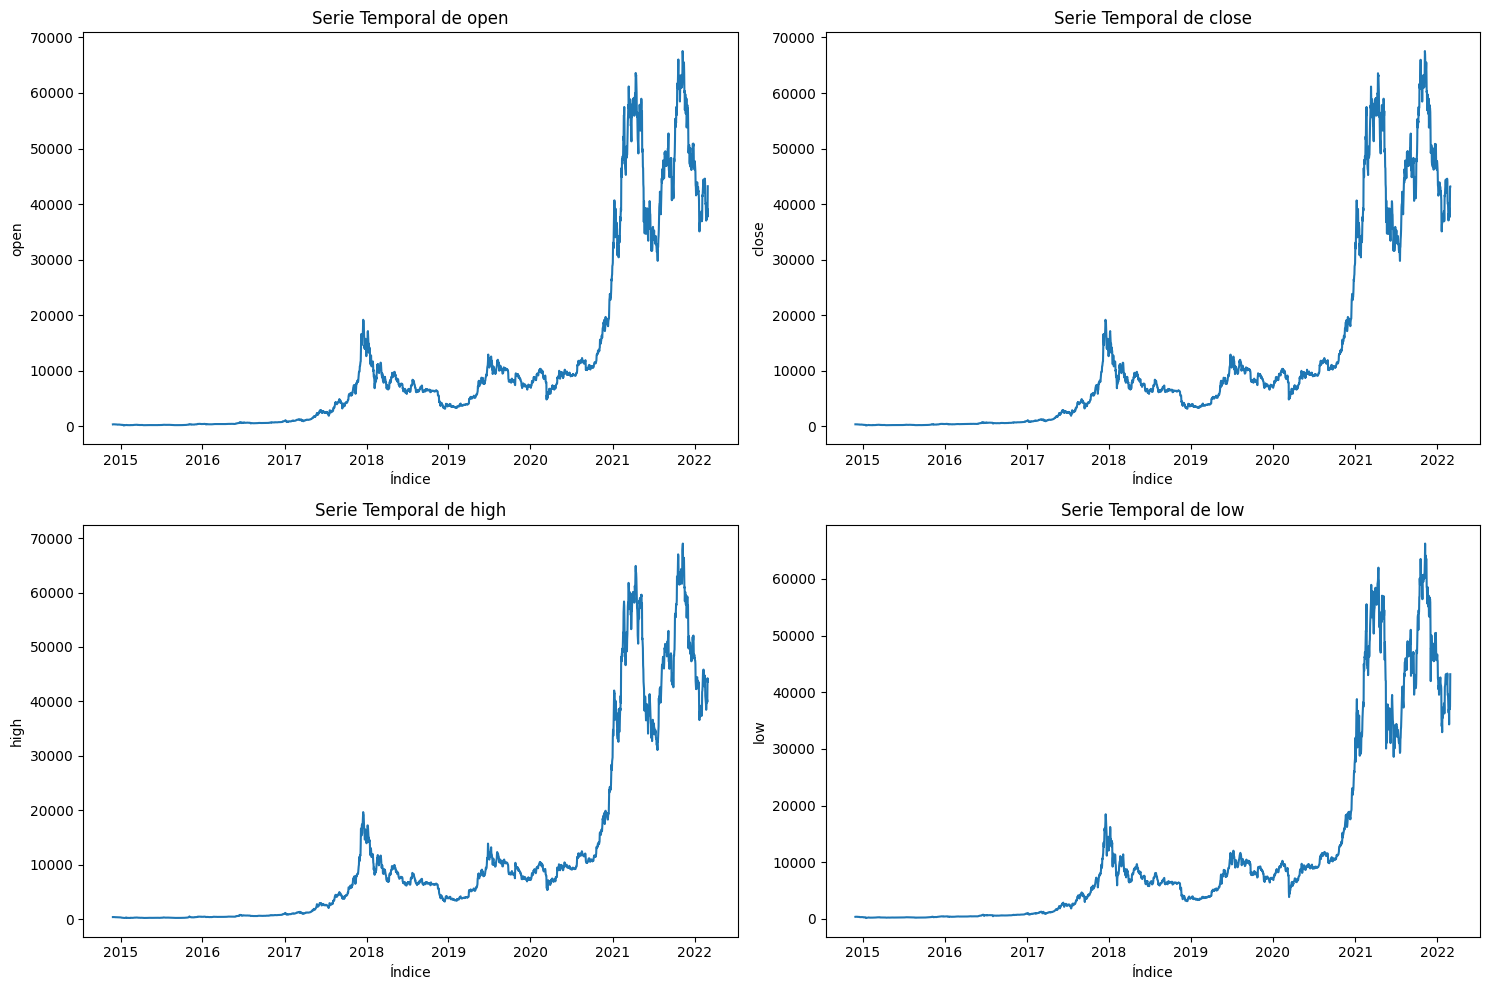

In [16]:
plot_time_series(df_btc, ['open', 'close', 'high', 'low'])

### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supón que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [17]:
def plot_time_series(df, time_series_columns, combined_plot = False, start_date = None, end_date = None):
    """
    Esta función toma un DataFrame y una lista de columnas numéricas que representan
    series temporales o secuencias, y dibuja cada columna en una sola gráfica en
    una matriz de 2 columnas como máximo. Además, permite combinar todas las series en
    una sola gráfica y filtrar por un rango de fechas.

    :param df: DataFrame de pandas.
    :param time_series_columns: Lista de nombres de columnas numéricas.
    :param combined_plot: Booleano que indica si se deben combinar todas las series en una sola gráfica.
    :param start_date: Fecha de inicio para filtrar los datos (formato 'YYYY-MM-DD').
    :param end_date: Fecha de fin para filtrar los datos (formato 'YYYY-MM-DD').
    """
    # Filtrar por fechas si se proporcionan
    if start_date:
        df = df[df.index >= start_date]
    if end_date:
        df = df[df.index <= end_date]

    if combined_plot:
        plt.figure(figsize = (15, 7))
        for column in time_series_columns:
            sns.lineplot(data = df, x = df.index, y = column, label = column)
        plt.title("Series Temporales Combinadas")
        plt.xlabel("Fecha")
        plt.ylabel("Valor")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        num_columns = 2
        num_rows = (len(time_series_columns) + 1) // num_columns

        fig, axs = plt.subplots(num_rows, num_columns, figsize = (15, 5*num_rows))

        for idx, column in enumerate(time_series_columns):
            row = idx // num_columns
            col = idx % num_columns
            ax = axs[row, col]

            sns.lineplot(data = df, x = df.index, y = column, ax = ax)
            ax.set_title(f"Serie Temporal de {column}")
            ax.set_xlabel("Fecha")
            ax.set_ylabel(column)

        # Si el número de columnas no es par, eliminamos el gráfico vacío
        if len(time_series_columns) % num_columns != 0:
            fig.delaxes(axs[num_rows - 1, num_columns - 1])

        plt.tight_layout()
        plt.show()

### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

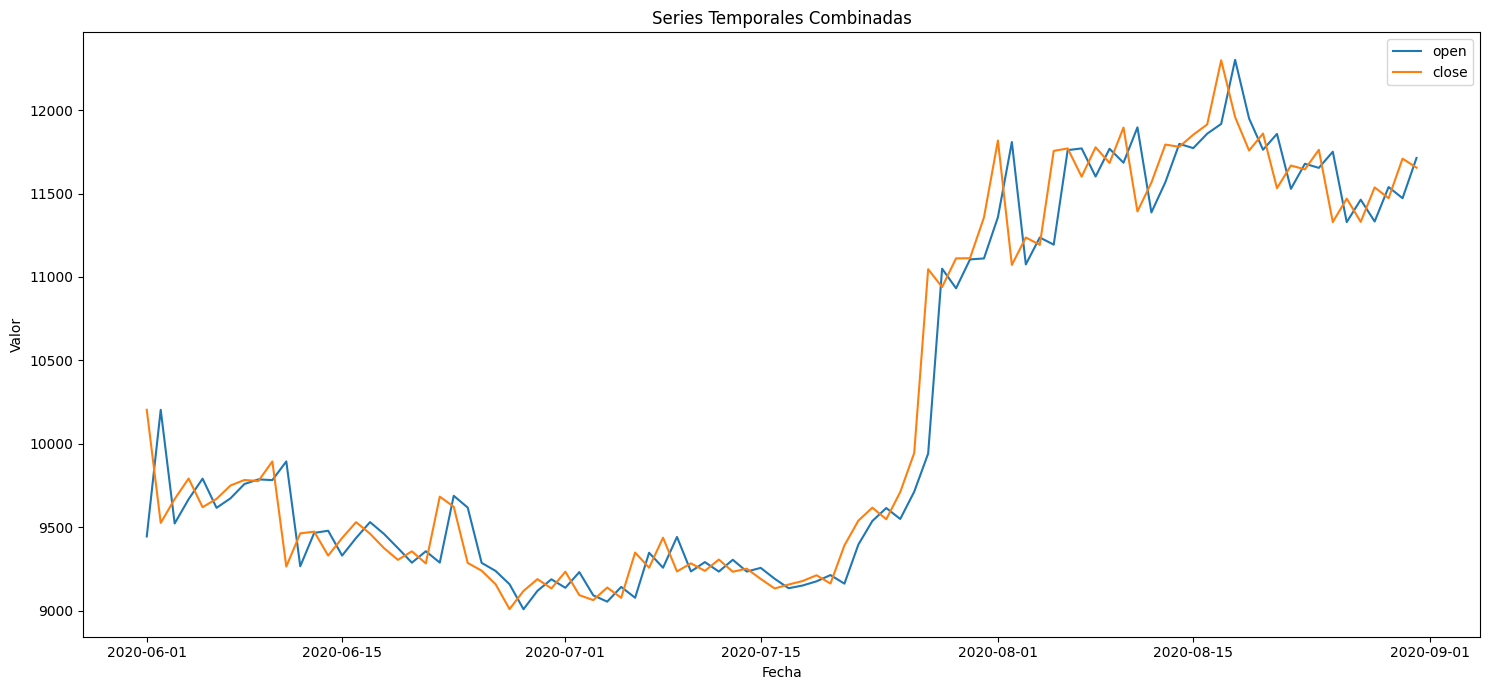

In [20]:
plot_time_series(df_btc, ['open', 'close'], combined_plot = True, start_date = '2020-06-01', end_date = '2020-08-31')